In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Train data shape: (1080, 1)
Test data shape: (121, 1)


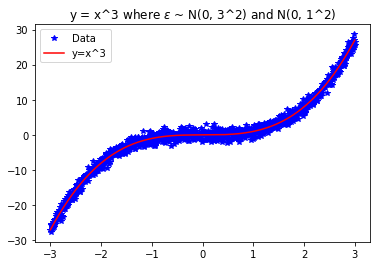

In [291]:
test_ratio = 0.1

data_range = 3
data_step = 0.005
data_sigma1 = 3
data_sigma2 = 1
num_data = 1

def pow_fun(x):
    return np.power(x, 3)

data_x = np.arange(-data_range, data_range + data_step, data_step)
data_x = np.reshape(data_x, [data_x.shape[0], 1])

data_y = np.zeros([data_x.shape[0], 1])
data_y_true = np.zeros([data_x.shape[0], 1])

for i in range(data_x.shape[0]):
#     if (data_x[i,0] < 0): 
#         data_y[i, 0] = pow_fun(data_x[i,0]) + np.random.normal(0, data_sigma1)
#     else:
    data_y[i, 0] = pow_fun(data_x[i,0]) + np.random.normal(0, data_sigma2)
        
    data_y_true[i, 0] = pow_fun(data_x[i,0])
    
num_train_data = int(data_x.shape[0] * (1 - test_ratio))
num_test_data  = data_x.shape[0] - num_train_data

train_x = data_x[:num_train_data, :]
train_y = data_y[:num_train_data, :]
test_x  = data_x[num_train_data:, :]
test_y  = data_y[num_train_data:, :]

print("Train data shape: " + str(train_x.shape))
print("Test data shape: " + str(test_x.shape))

plt.plot(data_x, data_y, 'b*')
plt.plot(data_x, data_y_true, 'r')
plt.legend(['Data', 'y=x^3'], loc = 'best')
plt.title('y = x^3 where $\epsilon$ ~ N(0, 3^2) and N(0, 1^2)')
plt.show()

In [294]:
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Dense, Layer, Dropout
from keras.models import Model
from keras.initializers import glorot_normal
import numpy as np

def custom_loss(sigma):
    def gaussian_loss(y_true, y_pred):
        return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6
    return gaussian_loss

class GaussianLayer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(GaussianLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel_1 = self.add_weight(name='kernel_1', 
                                      shape=(30, self.output_dim),
                                      initializer=glorot_normal(),
                                      trainable=True)
        self.kernel_2 = self.add_weight(name='kernel_2', 
                                      shape=(30, self.output_dim),
                                      initializer=glorot_normal(),
                                      trainable=True)
        self.bias_1 = self.add_weight(name='bias_1',
                                    shape=(self.output_dim, ),
                                    initializer=glorot_normal(),
                                    trainable=True)
        self.bias_2 = self.add_weight(name='bias_2',
                                    shape=(self.output_dim, ),
                                    initializer=glorot_normal(),
                                    trainable=True)
        super(GaussianLayer, self).build(input_shape) 

    def call(self, x):
        output_mu  = K.dot(x, self.kernel_1) + self.bias_1
        output_sig = K.dot(x, self.kernel_2) + self.bias_2
        output_sig_pos = K.log(1 + K.exp(output_sig)) + 1e-06  
        return [output_mu, output_sig_pos]

    def compute_output_shape(self, input_shape):
        return [(input_shape[0], self.output_dim), (input_shape[0], self.output_dim)]

inputs = Input(shape=(1,))
x = Dense(10, activation='relu')(inputs)
x = Dense(6, activation='relu')(x)
x = Dense(30, activation='relu')(x)
mu, sigma = GaussianLayer(1, name='main_output')(x)

model = Model(inputs, mu)
model.compile(loss=custom_loss(sigma), optimizer='adam')
model.fit(train_x, train_y, epochs=400)

layer_name = 'main_output' # Where to extract the output from
get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)

Epoch 1/400
1080/1080 [==============================] - 5s 5ms/step - loss: 52.1369
Epoch 2/400
1080/1080 [==============================] - 0s 89us/step - loss: 38.4606
Epoch 3/400
1080/1080 [==============================] - 0s 85us/step - loss: 25.9843
Epoch 4/400
1080/1080 [==============================] - 0s 84us/step - loss: 17.2890
Epoch 5/400
1080/1080 [==============================] - 0s 88us/step - loss: 11.9926
Epoch 6/400
1080/1080 [==============================] - 0s 84us/step - loss: 8.7295
Epoch 7/400
1080/1080 [==============================] - 0s 87us/step - loss: 6.6051
Epoch 8/400
1080/1080 [==============================] - 0s 92us/step - loss: 5.2343
Epoch 9/400
1080/1080 [==============================] - 0s 89us/step - loss: 4.2780
Epoch 10/400
1080/1080 [==============================] - 0s 89us/step - loss: 3.5968
Epoch 11/400
1080/1080 [==============================] - 0s 91us/step - loss: 3.1089
Epoch 12/400
1080/1080 [==============================] - 0

1080/1080 [==============================] - 0s 94us/step - loss: 0.6507
Epoch 96/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6485
Epoch 97/400
1080/1080 [==============================] - 0s 108us/step - loss: 0.6385
Epoch 98/400
1080/1080 [==============================] - 0s 124us/step - loss: 0.6306
Epoch 99/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.6250
Epoch 100/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.6159
Epoch 101/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.6090
Epoch 102/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.6029
Epoch 103/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5955
Epoch 104/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5878
Epoch 105/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5940
Epoch 106/400
1080/1080 [==============================] - 

1080/1080 [==============================] - 0s 93us/step - loss: 0.5148
Epoch 189/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5134
Epoch 190/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5189
Epoch 191/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5082
Epoch 192/400
1080/1080 [==============================] - 0s 81us/step - loss: 0.5223
Epoch 193/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5155
Epoch 194/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5165
Epoch 195/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5076
Epoch 196/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5088
Epoch 197/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.5060
Epoch 198/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5107
Epoch 199/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 96us/step - loss: 0.5023
Epoch 283/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5007
Epoch 284/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5032
Epoch 285/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5095
Epoch 286/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5005
Epoch 287/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5144
Epoch 288/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5035
Epoch 289/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5017
Epoch 290/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5068
Epoch 291/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5039
Epoch 292/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5018
Epoch 293/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 100us/step - loss: 0.5123
Epoch 376/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5059
Epoch 377/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5095
Epoch 378/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.4983
Epoch 379/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.4940
Epoch 380/400
1080/1080 [==============================] - ETA: 0s - loss: 0.520 - 0s 92us/step - loss: 0.5197
Epoch 381/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5057
Epoch 382/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5026
Epoch 383/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.5012
Epoch 384/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5081
Epoch 385/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.4996
Epoch 386/400
1080/1080 [======

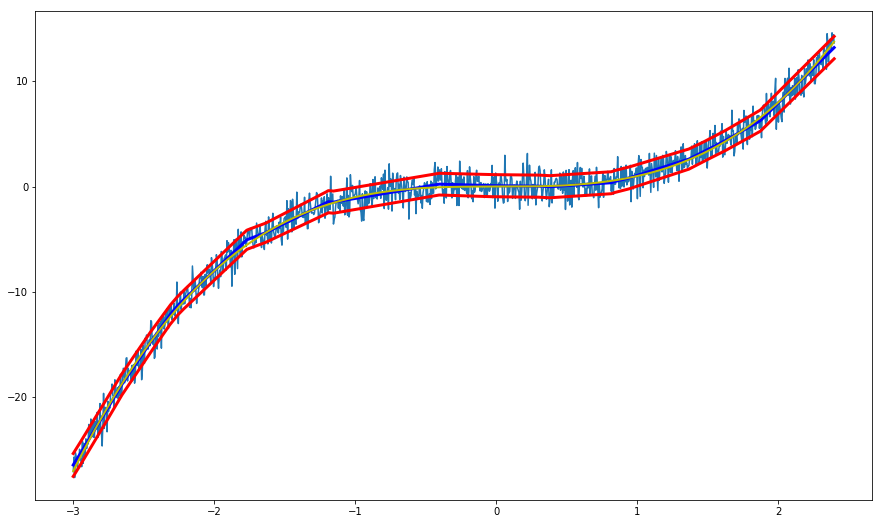

In [295]:
preds, sigmas = [], []
for j in range(len(train_x)):
    mu, sigma = get_intermediate([[train_x[j]]])
    preds.append(mu.reshape(1,)[0])
    sigmas.append(sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i[0] for i in train_x], [i for i in train_y])
plt.plot([i[0] for i in train_x], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.plot([i[0] for i in train_x], [i for i in upper], 'r', linewidth = 3)
plt.plot([i[0] for i in train_x], [i for i in lower], 'r', linewidth = 3)
plt.plot([i[0] for i in train_x], [pow_fun(i[0]) for i in train_x], 'y', linewidth = 2)

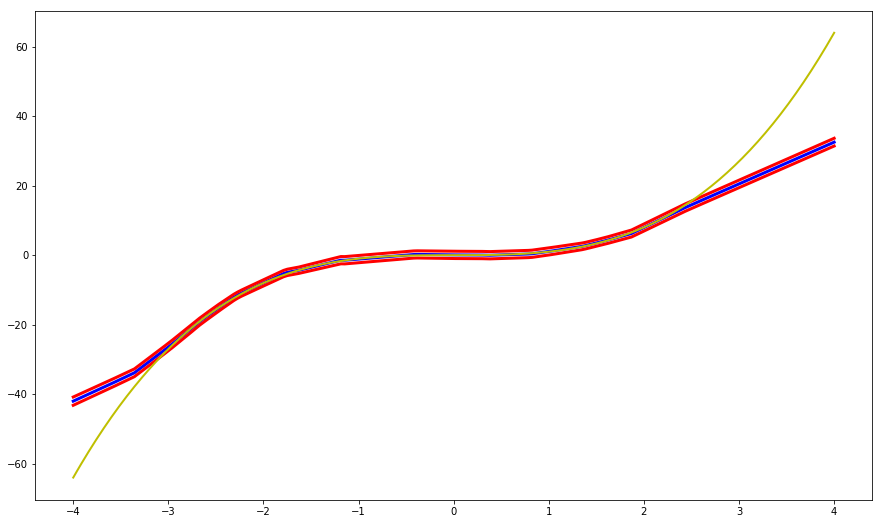

In [296]:
x_ax = np.linspace(-4, 4, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu, sigma = get_intermediate([[np.array([x_ax[j]])]])
    preds.append(mu.reshape(1,)[0])
    sigmas.append(sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.plot([i for i in x_ax], [i for i in upper], 'r', linewidth = 3)
plt.plot([i for i in x_ax], [i for i in lower], 'r', linewidth = 3)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)

In [297]:
# Experiment with multiple networks

def create_trained_network(train_x, train_y):
    inputs = Input(shape=(1,))
    x = Dense(10, activation='relu')(inputs)
    x = Dense(6, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    mu, sigma = GaussianLayer(1, name='main_output')(x)

    model = Model(inputs, mu)
    model.compile(loss=custom_loss(sigma), optimizer='adam')
    model.fit(train_x, train_y, epochs=400)

    layer_name = 'main_output' # Where to extract the output from
    get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)
    return get_intermediate

prediction_fns = []
for i in range(10):
    prediction_fns.append(create_trained_network(train_x, train_y))

Epoch 1/400
1080/1080 [==============================] - 6s 5ms/step - loss: 23.8368
Epoch 2/400
1080/1080 [==============================] - 0s 100us/step - loss: 14.6639
Epoch 3/400
1080/1080 [==============================] - 0s 94us/step - loss: 9.6509
Epoch 4/400
1080/1080 [==============================] - 0s 91us/step - loss: 6.8483
Epoch 5/400
1080/1080 [==============================] - 0s 95us/step - loss: 5.3967
Epoch 6/400
1080/1080 [==============================] - 0s 90us/step - loss: 4.5932
Epoch 7/400
1080/1080 [==============================] - 0s 87us/step - loss: 4.0357
Epoch 8/400
1080/1080 [==============================] - 0s 96us/step - loss: 3.6208
Epoch 9/400
1080/1080 [==============================] - 0s 107us/step - loss: 3.2887
Epoch 10/400
1080/1080 [==============================] - 0s 91us/step - loss: 3.0122
Epoch 11/400
1080/1080 [==============================] - 0s 98us/step - loss: 2.7706
Epoch 12/400
1080/1080 [==============================] - 0s

1080/1080 [==============================] - 0s 94us/step - loss: 0.5490
Epoch 97/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5440
Epoch 98/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5438
Epoch 99/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5445
Epoch 100/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5450
Epoch 101/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5438
Epoch 102/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5380
Epoch 103/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5429
Epoch 104/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5405
Epoch 105/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5371
Epoch 106/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5465
Epoch 107/400
1080/1080 [==============================] - 0

1080/1080 [==============================] - 0s 98us/step - loss: 0.5175
Epoch 191/400
1080/1080 [==============================] - 0s 101us/step - loss: 0.5265
Epoch 192/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5265
Epoch 193/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5177
Epoch 194/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5300
Epoch 195/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5156
Epoch 196/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5191
Epoch 197/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5290
Epoch 198/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5166
Epoch 199/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5176
Epoch 200/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5230
Epoch 201/400
1080/1080 [==============================]

1080/1080 [==============================] - 0s 94us/step - loss: 0.5133
Epoch 285/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5282
Epoch 286/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5227
Epoch 287/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5197
Epoch 288/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5288
Epoch 289/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5262
Epoch 290/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5195
Epoch 291/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5162
Epoch 292/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5122
Epoch 293/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5161
Epoch 294/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5140
Epoch 295/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 97us/step - loss: 0.5134
Epoch 379/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5190
Epoch 380/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5109
Epoch 381/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5124
Epoch 382/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5087
Epoch 383/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5172
Epoch 384/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5178
Epoch 385/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5109
Epoch 386/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5191
Epoch 387/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5196
Epoch 388/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5116
Epoch 389/400
1080/1080 [==============================]

1080/1080 [==============================] - 0s 95us/step - loss: 0.9073
Epoch 73/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.8971
Epoch 74/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.8847
Epoch 75/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.8741
Epoch 76/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.8667
Epoch 77/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.8549
Epoch 78/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.8408
Epoch 79/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.8297
Epoch 80/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.8179
Epoch 81/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.8067
Epoch 82/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.7943
Epoch 83/400
1080/1080 [==============================] - 0s 85us/s

1080/1080 [==============================] - 0s 159us/step - loss: 0.5635
Epoch 167/400
1080/1080 [==============================] - 0s 99us/step - loss: 0.5505
Epoch 168/400
1080/1080 [==============================] - 0s 142us/step - loss: 0.5478
Epoch 169/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5473
Epoch 170/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5532
Epoch 171/400
1080/1080 [==============================] - 0s 108us/step - loss: 0.5575
Epoch 172/400
1080/1080 [==============================] - 0s 166us/step - loss: 0.5528
Epoch 173/400
1080/1080 [==============================] - 0s 130us/step - loss: 0.5502
Epoch 174/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5512
Epoch 175/400
1080/1080 [==============================] - 0s 102us/step - loss: 0.5537
Epoch 176/400
1080/1080 [==============================] - 0s 120us/step - loss: 0.5462
Epoch 177/400
1080/1080 [=========================

1080/1080 [==============================] - 0s 91us/step - loss: 0.5174
Epoch 260/400
1080/1080 [==============================] - ETA: 0s - loss: 0.550 - 0s 92us/step - loss: 0.5163
Epoch 261/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5177
Epoch 262/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5179
Epoch 263/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5151
Epoch 264/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5152
Epoch 265/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5153
Epoch 266/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5162
Epoch 267/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5296
Epoch 268/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5142
Epoch 269/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5137
Epoch 270/400
1080/1080 [========

1080/1080 [==============================] - 0s 91us/step - loss: 0.5101
Epoch 353/400
1080/1080 [==============================] - 0s 112us/step - loss: 0.5176
Epoch 354/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5140
Epoch 355/400
1080/1080 [==============================] - 0s 108us/step - loss: 0.5099
Epoch 356/400
1080/1080 [==============================] - 0s 113us/step - loss: 0.5149
Epoch 357/400
1080/1080 [==============================] - 0s 116us/step - loss: 0.5136
Epoch 358/400
1080/1080 [==============================] - 0s 117us/step - loss: 0.5056
Epoch 359/400
1080/1080 [==============================] - 0s 112us/step - loss: 0.5098
Epoch 360/400
1080/1080 [==============================] - 0s 99us/step - loss: 0.5152
Epoch 361/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5117
Epoch 362/400
1080/1080 [==============================] - 0s 101us/step - loss: 0.5110
Epoch 363/400
1080/1080 [========================

1080/1080 [==============================] - 0s 89us/step - loss: 0.8681
Epoch 47/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.8474
Epoch 48/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.8231
Epoch 49/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.8029
Epoch 50/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.7828
Epoch 51/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.7592
Epoch 52/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.7340
Epoch 53/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.7145
Epoch 54/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.6961
Epoch 55/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.6822
Epoch 56/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.6639
Epoch 57/400
1080/1080 [==============================] - 0s 89us/s

1080/1080 [==============================] - 0s 84us/step - loss: 0.5219
Epoch 141/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5151
Epoch 142/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5233
Epoch 143/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5228
Epoch 144/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5253
Epoch 145/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5228
Epoch 146/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5269
Epoch 147/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5217
Epoch 148/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5259
Epoch 149/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5242
Epoch 150/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5193
Epoch 151/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 91us/step - loss: 0.5127
Epoch 235/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5120
Epoch 236/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5192
Epoch 237/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5121
Epoch 238/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.4995
Epoch 239/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5109
Epoch 240/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5065
Epoch 241/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5164
Epoch 242/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5167
Epoch 243/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5171
Epoch 244/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5062
Epoch 245/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 88us/step - loss: 0.5016
Epoch 329/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5053
Epoch 330/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.5107
Epoch 331/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5251
Epoch 332/400
1080/1080 [==============================] - 0s 82us/step - loss: 0.5155
Epoch 333/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.5081
Epoch 334/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5081
Epoch 335/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5115
Epoch 336/400
1080/1080 [==============================] - 0s 81us/step - loss: 0.5113
Epoch 337/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5104
Epoch 338/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5039
Epoch 339/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 93us/step - loss: 2.8170
Epoch 23/400
1080/1080 [==============================] - 0s 92us/step - loss: 2.6783
Epoch 24/400
1080/1080 [==============================] - 0s 95us/step - loss: 2.5468
Epoch 25/400
1080/1080 [==============================] - 0s 90us/step - loss: 2.4279
Epoch 26/400
1080/1080 [==============================] - 0s 93us/step - loss: 2.3158
Epoch 27/400
1080/1080 [==============================] - 0s 93us/step - loss: 2.2145
Epoch 28/400
1080/1080 [==============================] - 0s 93us/step - loss: 2.1208
Epoch 29/400
1080/1080 [==============================] - 0s 87us/step - loss: 2.0390
Epoch 30/400
1080/1080 [==============================] - 0s 92us/step - loss: 1.9701
Epoch 31/400
1080/1080 [==============================] - 0s 90us/step - loss: 1.9144
Epoch 32/400
1080/1080 [==============================] - 0s 91us/step - loss: 1.8668
Epoch 33/400
1080/1080 [==============================] - 0s 93us/s

1080/1080 [==============================] - 0s 89us/step - loss: 0.6759
Epoch 118/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.6698
Epoch 119/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.6703
Epoch 120/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.6661
Epoch 121/400
1080/1080 [==============================] - 0s 84us/step - loss: 0.6663
Epoch 122/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.6628
Epoch 123/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.6597
Epoch 124/400
1080/1080 [==============================] - 0s 83us/step - loss: 0.6594
Epoch 125/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.6589
Epoch 126/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.6540
Epoch 127/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.6567
Epoch 128/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 88us/step - loss: 0.5632
Epoch 212/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5739
Epoch 213/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5691
Epoch 214/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5692
Epoch 215/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5630
Epoch 216/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5629
Epoch 217/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5585
Epoch 218/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5650
Epoch 219/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5683
Epoch 220/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5610
Epoch 221/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5705
Epoch 222/400
1080/1080 [==============================] 

Epoch 305/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5379
Epoch 306/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5459
Epoch 307/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5376
Epoch 308/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5255
Epoch 309/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5321
Epoch 310/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5314
Epoch 311/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5400
Epoch 312/400
1080/1080 [==============================] - 0s 85us/step - loss: 0.5304
Epoch 313/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5312
Epoch 314/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5271
Epoch 315/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5258
Epoch 316/400
1080/1080 [==================

1080/1080 [==============================] - 0s 90us/step - loss: 0.5176
Epoch 400/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5151
Epoch 1/400
1080/1080 [==============================] - 6s 6ms/step - loss: 53.5540
Epoch 2/400
1080/1080 [==============================] - 0s 98us/step - loss: 35.7199
Epoch 3/400
1080/1080 [==============================] - 0s 99us/step - loss: 22.6341
Epoch 4/400
1080/1080 [==============================] - 0s 98us/step - loss: 14.8248
Epoch 5/400
1080/1080 [==============================] - 0s 95us/step - loss: 10.3867
Epoch 6/400
1080/1080 [==============================] - 0s 107us/step - loss: 7.7816
Epoch 7/400
1080/1080 [==============================] - 0s 98us/step - loss: 6.1971
Epoch 8/400
1080/1080 [==============================] - 0s 96us/step - loss: 5.0863
Epoch 9/400
1080/1080 [==============================] - 0s 104us/step - loss: 4.3041
Epoch 10/400
1080/1080 [==============================] - 0s 95us/ste

1080/1080 [==============================] - 0s 103us/step - loss: 0.6665
Epoch 95/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.6584
Epoch 96/400
1080/1080 [==============================] - 0s 110us/step - loss: 0.6468
Epoch 97/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.6394
Epoch 98/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.6322
Epoch 99/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.6238
Epoch 100/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.6174
Epoch 101/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.6199
Epoch 102/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.6081
Epoch 103/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.6146
Epoch 104/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.5966
Epoch 105/400
1080/1080 [==============================] -

1080/1080 [==============================] - 0s 122us/step - loss: 0.5197
Epoch 189/400
1080/1080 [==============================] - 0s 133us/step - loss: 0.5436
Epoch 190/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.5220
Epoch 191/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5172
Epoch 192/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5274
Epoch 193/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5296
Epoch 194/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5390
Epoch 195/400
1080/1080 [==============================] - 0s 86us/step - loss: 0.5276
Epoch 196/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5176
Epoch 197/400
1080/1080 [==============================] - 0s 121us/step - loss: 0.5174
Epoch 198/400
1080/1080 [==============================] - 0s 126us/step - loss: 0.5229
Epoch 199/400
1080/1080 [============================

1080/1080 [==============================] - 0s 90us/step - loss: 0.5093
Epoch 282/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5095
Epoch 283/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5064
Epoch 284/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5100
Epoch 285/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5056
Epoch 286/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5043
Epoch 287/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5100
Epoch 288/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5179
Epoch 289/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5058
Epoch 290/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5218
Epoch 291/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5171
Epoch 292/400
1080/1080 [==============================] 

Epoch 375/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5044
Epoch 376/400
1080/1080 [==============================] - 0s 102us/step - loss: 0.5169
Epoch 377/400
1080/1080 [==============================] - 0s 109us/step - loss: 0.5222
Epoch 378/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5017
Epoch 379/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5025
Epoch 380/400
1080/1080 [==============================] - 0s 106us/step - loss: 0.5173
Epoch 381/400
1080/1080 [==============================] - 0s 109us/step - loss: 0.5084
Epoch 382/400
1080/1080 [==============================] - 0s 114us/step - loss: 0.5099
Epoch 383/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5001
Epoch 384/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5071
Epoch 385/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5031
Epoch 386/400
1080/1080 [===========

1080/1080 [==============================] - 0s 112us/step - loss: 0.6712
Epoch 70/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.6553
Epoch 71/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.6427
Epoch 72/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6330
Epoch 73/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6225
Epoch 74/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5962
Epoch 75/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5814
Epoch 76/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5801
Epoch 77/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5761
Epoch 78/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5603
Epoch 79/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5632
Epoch 80/400
1080/1080 [==============================] - 0s 97us/

1080/1080 [==============================] - 0s 96us/step - loss: 0.5266
Epoch 163/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5163
Epoch 164/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5137
Epoch 165/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5081
Epoch 166/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5114
Epoch 167/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5170
Epoch 168/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5080
Epoch 169/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5087
Epoch 170/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5122
Epoch 171/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5077
Epoch 172/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5067
Epoch 173/400
1080/1080 [==============================] 

Epoch 256/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5026
Epoch 257/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5089
Epoch 258/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5288
Epoch 259/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5047
Epoch 260/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5022
Epoch 261/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5177
Epoch 262/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5059
Epoch 263/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5046
Epoch 264/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5032
Epoch 265/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5073
Epoch 266/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5113
Epoch 267/400
1080/1080 [==================

1080/1080 [==============================] - 0s 99us/step - loss: 0.5060
Epoch 350/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5061
Epoch 351/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5034
Epoch 352/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5018
Epoch 353/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5084
Epoch 354/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5101
Epoch 355/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5155
Epoch 356/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5102
Epoch 357/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5250
Epoch 358/400
1080/1080 [==============================] - 0s 99us/step - loss: 0.5064
Epoch 359/400
1080/1080 [==============================] - 0s 102us/step - loss: 0.5015
Epoch 360/400
1080/1080 [==============================]

1080/1080 [==============================] - 0s 140us/step - loss: 2.6427
Epoch 44/400
1080/1080 [==============================] - 0s 196us/step - loss: 2.5560
Epoch 45/400
1080/1080 [==============================] - 0s 175us/step - loss: 2.4711
Epoch 46/400
1080/1080 [==============================] - 0s 109us/step - loss: 2.3903
Epoch 47/400
1080/1080 [==============================] - 0s 113us/step - loss: 2.3164
Epoch 48/400
1080/1080 [==============================] - 0s 158us/step - loss: 2.2459
Epoch 49/400
1080/1080 [==============================] - 0s 167us/step - loss: 2.1762
Epoch 50/400
1080/1080 [==============================] - 0s 147us/step - loss: 2.1160
Epoch 51/400
1080/1080 [==============================] - 0s 139us/step - loss: 2.0547
Epoch 52/400
1080/1080 [==============================] - 0s 133us/step - loss: 1.9981
Epoch 53/400
1080/1080 [==============================] - 0s 168us/step - loss: 1.9377
Epoch 54/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 107us/step - loss: 0.6826
Epoch 138/400
1080/1080 [==============================] - 0s 113us/step - loss: 0.6796
Epoch 139/400
1080/1080 [==============================] - 0s 105us/step - loss: 0.6817
Epoch 140/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6772
Epoch 141/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.6807
Epoch 142/400
1080/1080 [==============================] - 0s 99us/step - loss: 0.6729
Epoch 143/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.6728
Epoch 144/400
1080/1080 [==============================] - 0s 100us/step - loss: 0.6742
Epoch 145/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.6759
Epoch 146/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.6737
Epoch 147/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.6839
Epoch 148/400
1080/1080 [============================

1080/1080 [==============================] - 0s 92us/step - loss: 0.5786
Epoch 232/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.5852
Epoch 233/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5744
Epoch 234/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5787
Epoch 235/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5752
Epoch 236/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5785
Epoch 237/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5773
Epoch 238/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5704
Epoch 239/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5731
Epoch 240/400
1080/1080 [==============================] - 0s 88us/step - loss: 0.5693
Epoch 241/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5780
Epoch 242/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 101us/step - loss: 0.5235
Epoch 326/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5219
Epoch 327/400
1080/1080 [==============================] - 0s 87us/step - loss: 0.5152
Epoch 328/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5441
Epoch 329/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5315
Epoch 330/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5405
Epoch 331/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5267
Epoch 332/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5220
Epoch 333/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5177
Epoch 334/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5289
Epoch 335/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5335
Epoch 336/400
1080/1080 [==============================

1080/1080 [==============================] - 0s 103us/step - loss: 4.2041
Epoch 20/400
1080/1080 [==============================] - 0s 154us/step - loss: 4.0482
Epoch 21/400
1080/1080 [==============================] - 0s 173us/step - loss: 3.9084
Epoch 22/400
1080/1080 [==============================] - 0s 190us/step - loss: 3.7779
Epoch 23/400
1080/1080 [==============================] - 0s 154us/step - loss: 3.6594
Epoch 24/400
1080/1080 [==============================] - 0s 119us/step - loss: 3.5484
Epoch 25/400
1080/1080 [==============================] - 0s 97us/step - loss: 3.4445
Epoch 26/400
1080/1080 [==============================] - 0s 94us/step - loss: 3.3475
Epoch 27/400
1080/1080 [==============================] - 0s 177us/step - loss: 3.2565
Epoch 28/400
1080/1080 [==============================] - 0s 129us/step - loss: 3.1710
Epoch 29/400
1080/1080 [==============================] - 0s 93us/step - loss: 3.0881
Epoch 30/400
1080/1080 [==============================] - 0

1080/1080 [==============================] - 0s 97us/step - loss: 0.8943
Epoch 114/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.8863
Epoch 115/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.8778
Epoch 116/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.8707
Epoch 117/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.8614
Epoch 118/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.8543
Epoch 119/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.8462
Epoch 120/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.8398
Epoch 121/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.8319
Epoch 122/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.8246
Epoch 123/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.8175
Epoch 124/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 101us/step - loss: 0.5669
Epoch 207/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5684
Epoch 208/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5655
Epoch 209/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5639
Epoch 210/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5677
Epoch 211/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5698
Epoch 212/400
1080/1080 [==============================] - 0s 108us/step - loss: 0.5732
Epoch 213/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5691
Epoch 214/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5654
Epoch 215/400
1080/1080 [==============================] - 0s 111us/step - loss: 0.5782
Epoch 216/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5689
Epoch 217/400
1080/1080 [===========================

1080/1080 [==============================] - 0s 97us/step - loss: 0.5526
Epoch 300/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5524
Epoch 301/400
1080/1080 [==============================] - 0s 89us/step - loss: 0.5514
Epoch 302/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5548
Epoch 303/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5518
Epoch 304/400
1080/1080 [==============================] - 0s 105us/step - loss: 0.5499
Epoch 305/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5488
Epoch 306/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5534
Epoch 307/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5532
Epoch 308/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5527
Epoch 309/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5559
Epoch 310/400
1080/1080 [==============================]

1080/1080 [==============================] - 0s 96us/step - loss: 0.5317
Epoch 393/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5379
Epoch 394/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.5321
Epoch 395/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.5405
Epoch 396/400
1080/1080 [==============================] - 0s 109us/step - loss: 0.5339
Epoch 397/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5351
Epoch 398/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5336
Epoch 399/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5302
Epoch 400/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5332
Epoch 1/400
1080/1080 [==============================] - 6s 6ms/step - loss: 40.7268
Epoch 2/400
1080/1080 [==============================] - 0s 111us/step - loss: 21.1514
Epoch 3/400
1080/1080 [==============================] - 0

Epoch 87/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.6680
Epoch 88/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.6578
Epoch 89/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6641
Epoch 90/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6476
Epoch 91/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.6447
Epoch 92/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.6337
Epoch 93/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6247
Epoch 94/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.6219
Epoch 95/400
1080/1080 [==============================] - 0s 101us/step - loss: 0.6175
Epoch 96/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.6122
Epoch 97/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.6059
Epoch 98/400
1080/1080 [=============================

1080/1080 [==============================] - 0s 99us/step - loss: 0.5443
Epoch 182/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5429
Epoch 183/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5382
Epoch 184/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5419
Epoch 185/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5437
Epoch 186/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5498
Epoch 187/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5425
Epoch 188/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5492
Epoch 189/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5424
Epoch 190/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5387
Epoch 191/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5417
Epoch 192/400
1080/1080 [==============================]

1080/1080 [==============================] - 0s 97us/step - loss: 0.5242
Epoch 275/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5176
Epoch 276/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5287
Epoch 277/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5305
Epoch 278/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5155
Epoch 279/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.5204
Epoch 280/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5159
Epoch 281/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5204
Epoch 282/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5193
Epoch 283/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5154
Epoch 284/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5222
Epoch 285/400
1080/1080 [============================

1080/1080 [==============================] - 0s 97us/step - loss: 0.5276
Epoch 368/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5120
Epoch 369/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5084
Epoch 370/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5118
Epoch 371/400
1080/1080 [==============================] - 0s 105us/step - loss: 0.5128
Epoch 372/400
1080/1080 [==============================] - 0s 104us/step - loss: 0.5216
Epoch 373/400
1080/1080 [==============================] - 0s 90us/step - loss: 0.5174
Epoch 374/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5084
Epoch 375/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5037
Epoch 376/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5220
Epoch 377/400
1080/1080 [==============================] - 0s 106us/step - loss: 0.5087
Epoch 378/400
1080/1080 [=============================

1080/1080 [==============================] - 0s 99us/step - loss: 0.8465
Epoch 62/400
1080/1080 [==============================] - 0s 106us/step - loss: 0.8319
Epoch 63/400
1080/1080 [==============================] - 0s 105us/step - loss: 0.8295
Epoch 64/400
1080/1080 [==============================] - 0s 103us/step - loss: 0.8099
Epoch 65/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.7929
Epoch 66/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.7822
Epoch 67/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.7702
Epoch 68/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.7657
Epoch 69/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.7465
Epoch 70/400
1080/1080 [==============================] - 0s 100us/step - loss: 0.7424
Epoch 71/400
1080/1080 [==============================] - 0s 98us/step - loss: 0.7306
Epoch 72/400
1080/1080 [==============================] - 0s 10

1080/1080 [==============================] - 0s 98us/step - loss: 0.5051
Epoch 156/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5063
Epoch 157/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5151
Epoch 158/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5107
Epoch 159/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5112
Epoch 160/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5139
Epoch 161/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5159
Epoch 162/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5057
Epoch 163/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5032
Epoch 164/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5181
Epoch 165/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5067
Epoch 166/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 96us/step - loss: 0.5117
Epoch 250/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5198
Epoch 251/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5098
Epoch 252/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5096
Epoch 253/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5104
Epoch 254/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5162
Epoch 255/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5199
Epoch 256/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5149
Epoch 257/400
1080/1080 [==============================] - 0s 96us/step - loss: 0.5114
Epoch 258/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5136
Epoch 259/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5104
Epoch 260/400
1080/1080 [==============================] 

1080/1080 [==============================] - 0s 99us/step - loss: 0.5064
Epoch 344/400
1080/1080 [==============================] - 0s 102us/step - loss: 0.5081
Epoch 345/400
1080/1080 [==============================] - 0s 91us/step - loss: 0.5070
Epoch 346/400
1080/1080 [==============================] - 0s 93us/step - loss: 0.5063
Epoch 347/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5186
Epoch 348/400
1080/1080 [==============================] - 0s 92us/step - loss: 0.5152
Epoch 349/400
1080/1080 [==============================] - 0s 95us/step - loss: 0.5134
Epoch 350/400
1080/1080 [==============================] - 0s 97us/step - loss: 0.5109
Epoch 351/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5048
Epoch 352/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5073
Epoch 353/400
1080/1080 [==============================] - 0s 94us/step - loss: 0.5109
Epoch 354/400
1080/1080 [==============================]

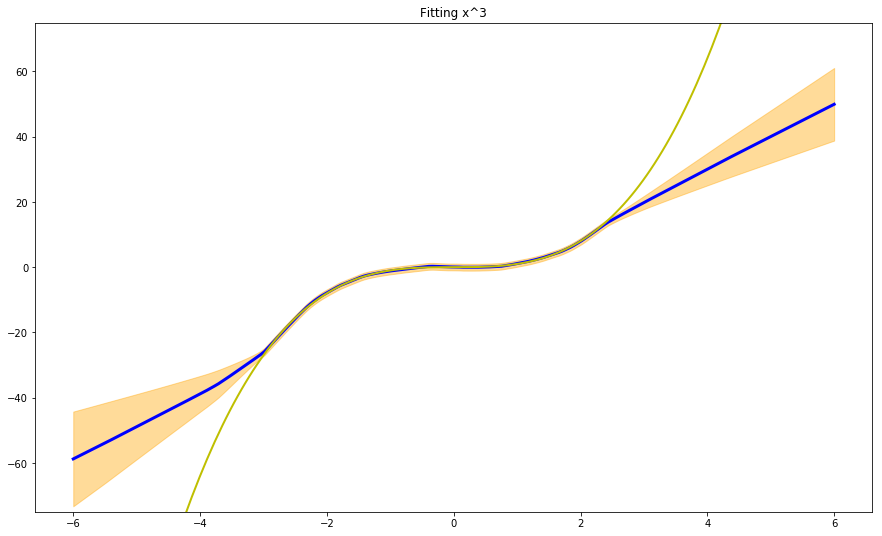

In [298]:
# Plot test with multiple networks

x_ax = np.linspace(-6, 6, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu_sigma = [(prediction_fns[i]([[np.array([x_ax[j]])]])[0][0][0], \
                prediction_fns[i]([[np.array([x_ax[j]])]])[1][0][0]) \
                for i in range(len(prediction_fns))]
    out_mus = [i for i,j in mu_sigma]
    out_mu = np.mean(out_mus)
    out_sigmas = [j for i,j in mu_sigma]
    out_sigma = np.sqrt(np.mean(out_sigmas + np.square(out_mus)) - np.square(out_mu))

    preds.append(out_mu.reshape(1,)[0])
    sigmas.append(out_sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

# plt.plot([i for i in x_ax], [i for i in upper], 'r', linewidth = 3)
# plt.plot([i for i in x_ax], [i for i in lower], 'r', linewidth = 3)
plt.fill_between(x_ax, upper, lower, color="orange", alpha=0.4)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)
plt.ylim(-75, 75)
plt.title('Fitting x^3')

In [306]:
# Adversarial exploration
inputs = Input(shape=(1,))
outputs = Input(shape=(1,))
x = Dense(10, activation='relu')(inputs)
x = Dense(6, activation='relu')(x)
x = Dense(30, activation='relu')(x)
mu, sigma = GaussianLayer(1, name='main_output')(x)

model = Model(inputs, mu)
model.compile(loss=custom_loss(sigma), optimizer='adam')

def gaussian_loss(y_true, y_pred, sigma):
    """
    Util function used to derive gradients w.r.t. to input data (for adversarial examples generation)
    """
    return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6

loss_calc = gaussian_nll(outputs, mu, sigma)
loss_gradients = tf.gradients(loss_calc, inputs)
gr_sign = tf.sign(loss_gradients)
adversarial_input_data = tf.add(inputs, 0.2 * gr_sign)

sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)
adversarial_input_data = sess.run([adversarial_input_data], feed_dict={inputs: train_x, outputs: train_y})[0]

augmented_train_x = np.concatenate([train_x, adversarial_input_data.reshape(train_x.shape[0], 1)])
augmented_train_y = np.concatenate([train_y, train_y])
model.fit(augmented_train_x, augmented_train_y, epochs=400)

get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)

Epoch 1/400
2160/2160 [==============================] - 7s 3ms/step - loss: 28.3951
Epoch 2/400
2160/2160 [==============================] - 0s 107us/step - loss: 12.1668
Epoch 3/400
2160/2160 [==============================] - 0s 98us/step - loss: 6.7443
Epoch 4/400
2160/2160 [==============================] - 0s 96us/step - loss: 4.5079
Epoch 5/400
2160/2160 [==============================] - 0s 100us/step - loss: 3.5150
Epoch 6/400
2160/2160 [==============================] - 0s 101us/step - loss: 2.9537
Epoch 7/400
2160/2160 [==============================] - 0s 102us/step - loss: 2.5837
Epoch 8/400
2160/2160 [==============================] - 0s 104us/step - loss: 2.3255
Epoch 9/400
2160/2160 [==============================] - 0s 100us/step - loss: 2.1330
Epoch 10/400
2160/2160 [==============================] - 0s 104us/step - loss: 1.9746
Epoch 11/400
2160/2160 [==============================] - 0s 104us/step - loss: 1.8855
Epoch 12/400
2160/2160 [==============================

2160/2160 [==============================] - 0s 111us/step - loss: 0.7984
Epoch 96/400
2160/2160 [==============================] - 0s 101us/step - loss: 0.7976
Epoch 97/400
2160/2160 [==============================] - 0s 105us/step - loss: 0.8003
Epoch 98/400
2160/2160 [==============================] - 0s 103us/step - loss: 0.7996
Epoch 99/400
2160/2160 [==============================] - 0s 109us/step - loss: 0.8006
Epoch 100/400
2160/2160 [==============================] - 0s 103us/step - loss: 0.7975
Epoch 101/400
2160/2160 [==============================] - 0s 101us/step - loss: 0.8028
Epoch 102/400
2160/2160 [==============================] - 0s 106us/step - loss: 0.7997
Epoch 103/400
2160/2160 [==============================] - 0s 104us/step - loss: 0.8012
Epoch 104/400
2160/2160 [==============================] - 0s 107us/step - loss: 0.8012
Epoch 105/400
2160/2160 [==============================] - 0s 101us/step - loss: 0.7971
Epoch 106/400
2160/2160 [=========================

2160/2160 [==============================] - 0s 98us/step - loss: 0.7935
Epoch 189/400
2160/2160 [==============================] - 0s 97us/step - loss: 0.7946
Epoch 190/400
2160/2160 [==============================] - 0s 103us/step - loss: 0.7907
Epoch 191/400
2160/2160 [==============================] - 0s 105us/step - loss: 0.7931
Epoch 192/400
2160/2160 [==============================] - 0s 101us/step - loss: 0.7957
Epoch 193/400
2160/2160 [==============================] - 0s 97us/step - loss: 0.7973
Epoch 194/400
2160/2160 [==============================] - 0s 99us/step - loss: 0.7931
Epoch 195/400
2160/2160 [==============================] - 0s 104us/step - loss: 0.7915
Epoch 196/400
2160/2160 [==============================] - 0s 99us/step - loss: 0.7915
Epoch 197/400
2160/2160 [==============================] - 0s 97us/step - loss: 0.7951
Epoch 198/400
2160/2160 [==============================] - 0s 96us/step - loss: 0.7942
Epoch 199/400
2160/2160 [============================

2160/2160 [==============================] - 0s 109us/step - loss: 0.7923
Epoch 282/400
2160/2160 [==============================] - 0s 104us/step - loss: 0.7928
Epoch 283/400
2160/2160 [==============================] - 0s 114us/step - loss: 0.7942
Epoch 284/400
2160/2160 [==============================] - 0s 106us/step - loss: 0.7956
Epoch 285/400
2160/2160 [==============================] - 0s 102us/step - loss: 0.7891
Epoch 286/400
2160/2160 [==============================] - 0s 102us/step - loss: 0.7936
Epoch 287/400
2160/2160 [==============================] - 0s 107us/step - loss: 0.7896
Epoch 288/400
2160/2160 [==============================] - 0s 103us/step - loss: 0.7922
Epoch 289/400
2160/2160 [==============================] - 0s 107us/step - loss: 0.7946
Epoch 290/400
2160/2160 [==============================] - 0s 107us/step - loss: 0.7926
Epoch 291/400
2160/2160 [==============================] - 0s 101us/step - loss: 0.7912
Epoch 292/400
2160/2160 [=====================

2160/2160 [==============================] - 0s 92us/step - loss: 0.7920
Epoch 375/400
2160/2160 [==============================] - 0s 90us/step - loss: 0.7902
Epoch 376/400
2160/2160 [==============================] - 0s 91us/step - loss: 0.7909
Epoch 377/400
2160/2160 [==============================] - 0s 94us/step - loss: 0.7981
Epoch 378/400
2160/2160 [==============================] - 0s 96us/step - loss: 0.7938
Epoch 379/400
2160/2160 [==============================] - 0s 92us/step - loss: 0.7918
Epoch 380/400
2160/2160 [==============================] - 0s 94us/step - loss: 0.7920
Epoch 381/400
2160/2160 [==============================] - 0s 90us/step - loss: 0.7908
Epoch 382/400
2160/2160 [==============================] - 0s 91us/step - loss: 0.7933
Epoch 383/400
2160/2160 [==============================] - 0s 97us/step - loss: 0.7942
Epoch 384/400
2160/2160 [==============================] - 0s 91us/step - loss: 0.7909
Epoch 385/400
2160/2160 [==============================] 

In [320]:
# Multiple networks with adversarial examples

def create_trained_network_with_adv(train_x, train_y):
    inputs = Input(shape=(1,))
    outputs = Input(shape=(1,))
    x = Dense(10, activation='relu')(inputs)
    x = Dense(6, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    mu, sigma = GaussianLayer(1, name='main_output')(x)

    model = Model(inputs, mu)
    model.compile(loss=custom_loss(sigma), optimizer='adam')

    def gaussian_loss(y_true, y_pred, sigma):
        """
        Util function used to derive gradients w.r.t. to input data (for adversarial examples generation)
        """
        return tf.reduce_mean(0.5*tf.log(sigma) + 0.5*tf.div(tf.square(y_true - y_pred), sigma)) + 1e-6

    loss_calc = gaussian_nll(outputs, mu, sigma)
    loss_gradients = tf.gradients(loss_calc, inputs)
    gr_sign = tf.sign(loss_gradients)
    adversarial_input_data = tf.add(inputs, 0.4 * gr_sign)

    sess = tf.Session()
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    adversarial_input_data = sess.run([adversarial_input_data], feed_dict={inputs: train_x, outputs: train_y})[0]

    augmented_train_x = np.concatenate([train_x, adversarial_input_data.reshape(train_x.shape[0], 1)])
    augmented_train_y = np.concatenate([train_y, train_y])
    model.fit(augmented_train_x, augmented_train_y, epochs=400, verbose=0)

    get_intermediate = K.function(inputs=[model.input], outputs=model.get_layer(layer_name).output)
    return get_intermediate

prediction_fns_adv = []
for i in range(10):
    print(i)
    prediction_fns_adv.append(create_trained_network_with_adv(train_x, train_y))

0
1
2
3
4
5
6
7
8
9


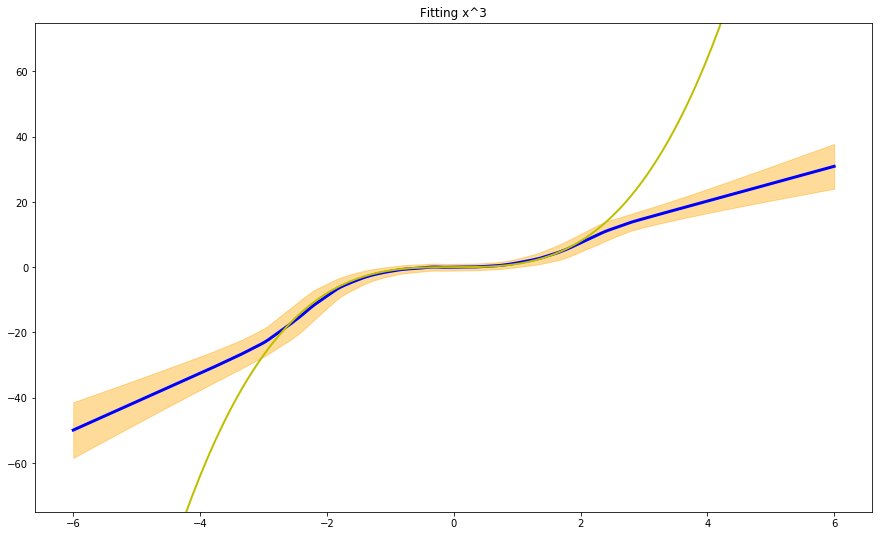

In [321]:
# Plot test with multiple networks

x_ax = np.linspace(-6, 6, num=200)
preds, sigmas = [], []
for j in range(len(x_ax)):
    
    mu_sigma = [(prediction_fns_adv[i]([[np.array([x_ax[j]])]])[0][0][0], \
                prediction_fns_adv[i]([[np.array([x_ax[j]])]])[1][0][0]) \
                for i in range(len(prediction_fns))]
    out_mus = [i for i,j in mu_sigma]
    out_mu = np.mean(out_mus)
    out_sigmas = [j for i,j in mu_sigma]
    out_sigma = np.sqrt(np.mean(out_sigmas + np.square(out_mus)) - np.square(out_mu))

    preds.append(out_mu.reshape(1,)[0])
    sigmas.append(out_sigma.reshape(1,)[0])

plt.figure(1, figsize=(15, 9))
plt.plot([i for i in x_ax], [i for i in preds], 'b', linewidth=3)
upper = [i+k for i,k in zip(preds, sigmas)]
lower = [i-k for i,k in zip(preds, sigmas)]

plt.fill_between(x_ax, upper, lower, color="orange", alpha=0.4)
plt.plot([i for i in x_ax], [pow_fun(i) for i in x_ax], 'y', linewidth = 2)
plt.ylim(-75, 75)
plt.title('Fitting x^3')